# DATA

In [45]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [3]:
import pandas as pd
data = pd.read_csv('/Users/tharick/Epitech/T-DAT-901-PAR_3/KaDo.csv')

In [20]:
data.columns

Index(['TICKET_ID', 'MOIS_VENTE', 'PRIX_NET', 'FAMILLE', 'UNIVERS', 'MAILLE',
       'LIBELLE', 'CLI_ID'],
      dtype='object')

In [28]:
data.isna().sum()

TICKET_ID     0
MOIS_VENTE    0
PRIX_NET      0
FAMILLE       0
UNIVERS       0
MAILLE        0
LIBELLE       0
CLI_ID        0
dtype: int64

In [4]:
data['PRIX_NET'].describe()

count    7.245522e+06
mean     5.970084e+00
std      5.885542e+00
min      1.000000e-02
25%      1.950000e+00
50%      4.250000e+00
75%      7.450000e+00
max      1.575000e+03
Name: PRIX_NET, dtype: float64

In [58]:
products = data['LIBELLE'].value_counts().to_frame()
products.reset_index(inplace=True)
products = products.rename(columns = {'index':'name', 'LIBELLE': 'count'})
products

,name,count
0,DEMAQ EXPRESS PUR BLEUET FL125ML,158762
1,GD JDM4 LOTUS FL200ML,85914
2,GD JDM4 GRENADE FL200ML,81406
3,SVC CREME QUOTIDIENNE T75ml,72394
4,MDT SD DES LAGONS 150 ML,64400
...,...,...
1479,LAIT ENFANT IP30 FL150 PROT VEG,1
1480,EDT ODE A L' AMOUR PASSIONNEMENT30ML,1
1481,FDT PINCEAU ECLAT MEDIUM CN3 15,1
1482,HYDRA SEVE NUIT HYDRASP P50ML,1


In [80]:
products[products['count'] > 100]

,name,count
0,DEMAQ EXPRESS PUR BLEUET FL125ML,158762
1,GD JDM4 LOTUS FL200ML,85914
2,GD JDM4 GRENADE FL200ML,81406
3,SVC CREME QUOTIDIENNE T75ml,72394
4,MDT SD DES LAGONS 150 ML,64400
...,...,...
1163,BIO CREME DOUCHE MAUVE 200 ML,105
1164,VAO GLITTER ROS/PAILL HIV13 ANI LU4 3ML,104
1165,VAO OR SCINTIL NOEL12 LU4 ANI 3ML,104
1166,FAP MONO BAIE ROSE CN3 3g,102


In [30]:
parfum = data[data['LIBELLE'] == 'DEMAQ EXPRESS PUR BLEUET FL125ML']
parfum_prix_net = parfum['PRIX_NET']

In [7]:
parfum_prix_net.describe()

count    158762.000000
mean          4.480944
std           1.992971
min           0.010000
25%           3.600000
50%           3.650000
75%           3.950000
max          65.700000
Name: PRIX_NET, dtype: float64

In [8]:
parfum_prix_net[parfum_prix_net > 14].describe()

count    1239.000000
mean       16.942050
std         5.137828
min        14.100000
25%        14.600000
50%        14.600000
75%        17.500000
max        65.700000
Name: PRIX_NET, dtype: float64

In [16]:
model = IsolationForest(contamination=0.01)
outliers_idx = model.fit_predict(parfum_prix_net.to_numpy().reshape(-1, 1))

In [19]:
parfum_prix_net[outliers_idx == -1].index

Int64Index([  21847,   33760,   36566,   36591,   57954,   60821,   61967,
              71806,   78376,   78389,
            ...
            7146850, 7159068, 7163924, 7175435, 7183006, 7185457, 7189416,
            7194018, 7201167, 7239440],
           dtype='int64', length=1476)

In [23]:
data['MOIS_VENTE'][parfum_prix_net[outliers_idx == -1].index].value_counts()

1     187
3     183
12    172
7     141
9     137
6     128
10    121
2     110
4      96
5      79
11     66
8      56
Name: MOIS_VENTE, dtype: int64

In [40]:
parfum[['FAMILLE', 'UNIVERS', 'MAILLE']].value_counts()

FAMILLE          UNIVERS           MAILLE    
SOINS DU VISAGE  VIS_DEMAQ BLEUET  VIS_AUTRES    158762
dtype: int64

In [41]:
parfum

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
205,36111293,12,3.50,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,131204016
213,35117363,8,3.95,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,169985247
304,35183711,8,3.65,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,275493987
326,34502875,6,3.65,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,321933797
371,35271713,9,3.60,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,356998310
...,...,...,...,...,...,...,...,...
7245231,35849427,11,3.95,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,997048290
7245232,36063055,11,7.30,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,997048290
7245233,36302012,12,3.65,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,997048290
7245236,36507016,12,2.88,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,997048290


<AxesSubplot:xlabel='PRIX_NET', ylabel='MOIS_VENTE'>

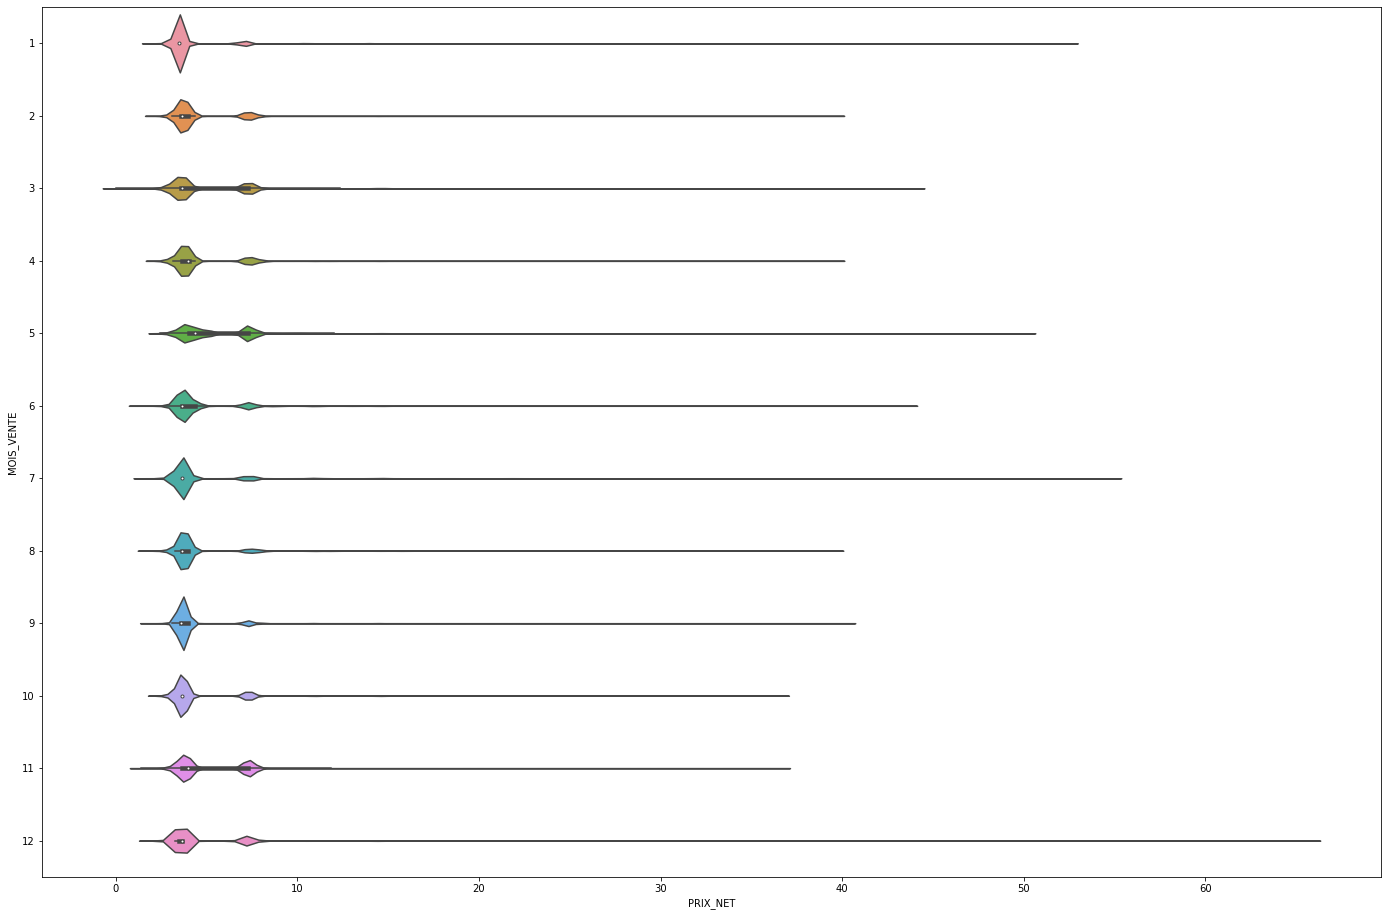

In [49]:
fig, ax = plt.subplots(figsize=(24,16))
sns.violinplot(data=parfum, x="PRIX_NET", y="MOIS_VENTE", ax=ax, orient="h")

<AxesSubplot:xlabel='PRIX_NET', ylabel='MOIS_VENTE'>

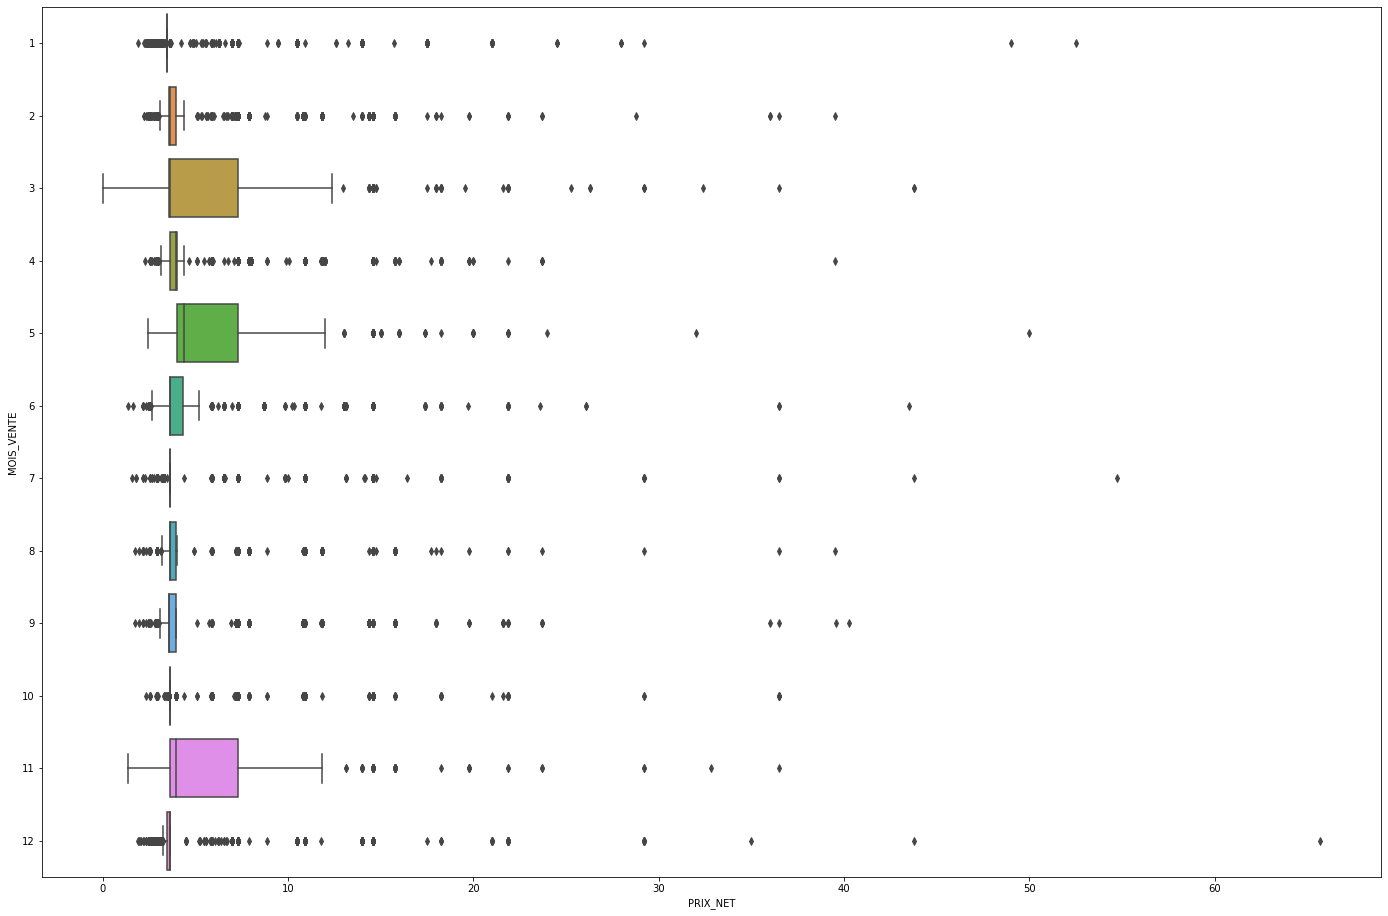

In [43]:
fig, ax = plt.subplots(figsize=(24,16))
sns.boxplot(data=parfum, x="PRIX_NET", y="MOIS_VENTE", ax=ax, orient="h")

<AxesSubplot:xlabel='PRIX_NET'>

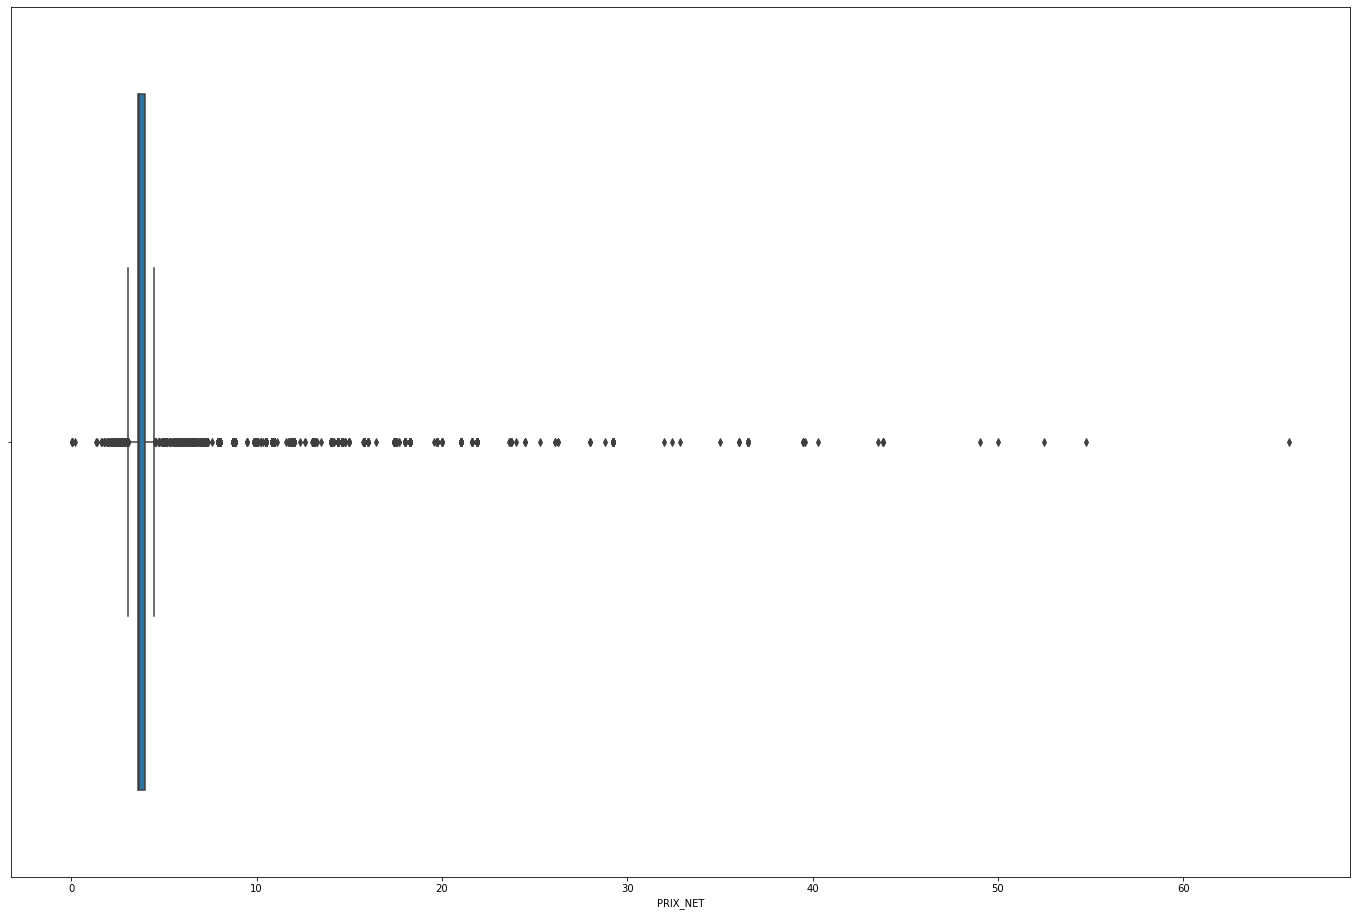

In [68]:
fig, ax = plt.subplots(figsize=(24,16))
sns.boxplot(data=parfum, x="PRIX_NET", ax=ax, orient="h")